<a href="https://colab.research.google.com/github/zhiqicheng/SciCo/blob/main/covid_kg_isef2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained('allenai/longformer-scico')
model = AutoModelForSequenceClassification.from_pretrained('allenai/longformer-scico')

start_token = tokenizer.convert_tokens_to_ids("<m>")
end_token = tokenizer.convert_tokens_to_ids("</m>")

def get_global_attention(input_ids):
    global_attention_mask = torch.zeros(input_ids.shape)
    global_attention_mask[:, 0] = 1  # global attention to the CLS token
    start = torch.nonzero(input_ids == start_token) # global attention to the <m> token
    end = torch.nonzero(input_ids == end_token) # global attention to the </m> token
    globs = torch.cat((start, end))
    value = torch.ones(globs.shape[0])
    global_attention_mask.index_put_(tuple(globs.t()), value)
    return global_attention_mask
    
m1 = "<m> language processing </m> "
m2 = "<m> language understanding </m>"

inputs = m1 + " </s></s> " + m2  

tokens = tokenizer(inputs, return_tensors='pt')
global_attention_mask = get_global_attention(tokens['input_ids'])

with torch.no_grad():
    output = model(tokens['input_ids'], tokens['attention_mask'], global_attention_mask)
    
scores = torch.softmax(output.logits, dim=-1)
# tensor([[0.0818, 0.0023, 0.0019, 0.9139]]) -- m1 is a child of m2

In [29]:
scores

tensor([[0.0260, 0.3146, 0.5285, 0.1309]])

<function matplotlib.pyplot.show>

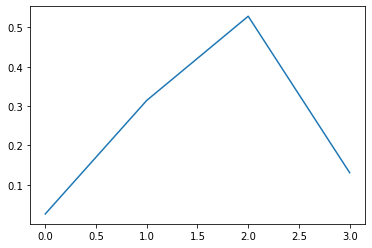

In [31]:
import matplotlib.pyplot as plt
#plt.title("")
y=scores[0].numpy()
plt.plot(y,)
plt.show